In [15]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

from tectosaur.fmm.ts_terms import *

In [46]:
n_src = 100
n_obs = 100
order = 5
src_pts = np.random.rand(n_src, 3) - 0.5
str = np.random.rand(n_src)
W = 8
xs = np.linspace(-W, W, n_obs)
X, Y = np.meshgrid(xs, xs)
obs_pts = np.zeros((X.size, 3))
obs_pts[:,0] = X.flatten()
obs_pts[:,1] = Y.flatten()

r = scipy.spatial.distance.cdist(src_pts, obs_pts)
correct = np.sum((1.0 / r).T * str, axis = 1)


exp_pt = np.array((0,0,0))
src_sep = src_pts - exp_pt[np.newaxis,:]
Rsumreal = np.zeros((order + 1, 2 * order + 1))
Rsumimag = np.zeros((order + 1, 2 * order + 1))
for i in range(src_sep.shape[0]):
    Rvr, Rvi = R(order, src_sep[i,:])
    Rsumreal += Rvr * str[i]
    Rsumimag += Rvi * str[i]

obs_sep = obs_pts - exp_pt[np.newaxis,:]
result = np.zeros(obs_pts.shape[0])
for i in range(obs_sep.shape[0]):
    Svr, Svi = S(order, obs_sep[i,:])
    # for mi in range(order + 1):
    #     result[i] += np.sum(
    #         Svr[:,order + mi] * Rsumreal[:,order + mi]
    #         + Svi[:,order + mi] * Rsumimag[:,order + mi]
    #     )
    #     if mi > 0:
    #         result[i] += np.sum(
    #             ((-1) ** (2 * mi)) * Svr[:,order + mi] * Rsumreal[:,order + mi]
    #             + ((-1) ** (2 * mi + 2)) * Svi[:,order + mi] * Rsumimag[:,order + mi]
    #         )
    result[i] += np.sum(Svr * Rsumreal + Svi * Rsumimag)
n_multipole = (order + 1) * (2 * order + 1)
print(n_src * n_obs, n_src * n_multipole + n_multipole * n_obs)
print(order, n_multipole, (result - correct)[-1], result[-1], correct[-1])

10000 13200
5 66 1.4504957235317306e-09 4.580069233607722 4.580069232157226


In [47]:
levels = np.linspace(np.min(correct), np.max(correct), 21)

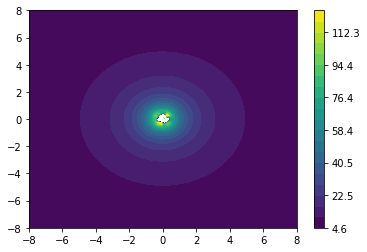

In [48]:
plt.contourf(X, Y, result.reshape(X.shape), levels = levels)
plt.colorbar()
plt.show()

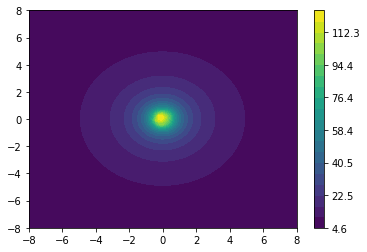

In [49]:
plt.contourf(X, Y, correct.reshape(X.shape), levels = levels)
plt.colorbar()
plt.show()

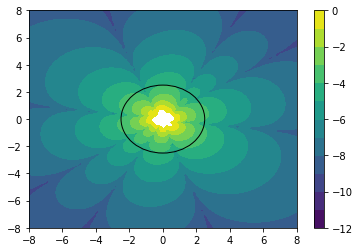

In [50]:
diff = result - correct
plt.contourf(X, Y, np.log10(np.abs(diff.reshape(X.shape))), levels = np.linspace(-12, 0, 13))
plt.gca().add_artist(plt.Circle((0, 0), 2.5, color='k', fill=False))
plt.colorbar()
plt.show()